### Data Exploration and Preprocessing Steps

This code explores, cleans, and visualizes the dataset to support the privacy-preserving personalized fitness recommender system by ensuring data quality and consistency, enabling accurate analysis of workout, nutrition, and privacy preferences among university students in India.

The key steps are:

1. **Load and Display Basic Info**: Import the dataset and show an overview of columns and data types.
2. **Identify Missing Values**: Check for missing values in each column.
3. **Handle Missing Data**: Fill missing values in numerical columns with mean/median and categorical with mode.
4. **Remove Duplicates**: Detect and drop any duplicate rows.
5. **Standardize Data**: Clean and standardize text fields for consistency.
6. **Analyze Cleaned Data**: Display the dataset summary after preprocessing.
7. **Visualize Key Features**: Generate plots to examine age distribution, daily steps by privacy level, and workout preferences by gender.

##### Sakshi Pradeep - 21BDS0108

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:

# Load the dataset
data = pd.read_csv('student_fitness_data.csv')

# Step 1: Display basic information
print("Dataset Info:")
data.info()

print("\nPreview of Dataset:")
print(data.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student_ID            100 non-null    int64  
 1   Age                   97 non-null     float64
 2   Gender                98 non-null     object 
 3   Weight_kg             96 non-null     float64
 4   Height_cm             97 non-null     float64
 5   Goal                  100 non-null    object 
 6   Workout_Plan          100 non-null    object 
 7   Nutrition_Suggestion  100 non-null    object 
 8   Daily_Steps           95 non-null     float64
 9   Privacy_Level         100 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 7.9+ KB

Preview of Dataset:
   Student_ID   Age Gender  Weight_kg  Height_cm                 Goal  \
0           1  20.0      M       70.0      175.0          Weight Loss   
1           2  22.0      F       55.0    

In [10]:

# Step 2: Handling Missing Values
print("\nMissing Values by Column:")
print(data.isnull().sum())

# Fill missing numerical values with mean or median, categorical with mode
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Weight_kg'].fillna(data['Weight_kg'].mean(), inplace=True)
data['Height_cm'].fillna(data['Height_cm'].mean(), inplace=True)
data['Daily_Steps'].fillna(data['Daily_Steps'].median(), inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)



Missing Values by Column:
Student_ID              0
Age                     3
Gender                  2
Weight_kg               4
Height_cm               3
Goal                    0
Workout_Plan            0
Nutrition_Suggestion    0
Daily_Steps             5
Privacy_Level           0
dtype: int64


In [11]:

# Step 3: Detecting and removing duplicate entries if any
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
data.drop_duplicates(inplace=True)



Number of duplicate rows: 0


In [12]:

# Step 4: Data Cleaning and Standardization (e.g., formatting)
# Removing extra spaces in Goal column if any
data['Goal'] = data['Goal'].str.strip()


In [13]:

# Step 5: Analyzing the Cleaned Data
print("\nCleaned Dataset Info:")
data.info()

print("\nSummary of Cleaned Dataset:")
print(data.describe())



Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student_ID            100 non-null    int64  
 1   Age                   100 non-null    float64
 2   Gender                100 non-null    object 
 3   Weight_kg             100 non-null    float64
 4   Height_cm             100 non-null    float64
 5   Goal                  100 non-null    object 
 6   Workout_Plan          100 non-null    object 
 7   Nutrition_Suggestion  100 non-null    object 
 8   Daily_Steps           100 non-null    float64
 9   Privacy_Level         100 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 7.9+ KB

Summary of Cleaned Dataset:
       Student_ID         Age   Weight_kg   Height_cm   Daily_Steps
count  100.000000  100.000000  100.000000  100.000000    100.000000
mean    50.500000   21.577320   67

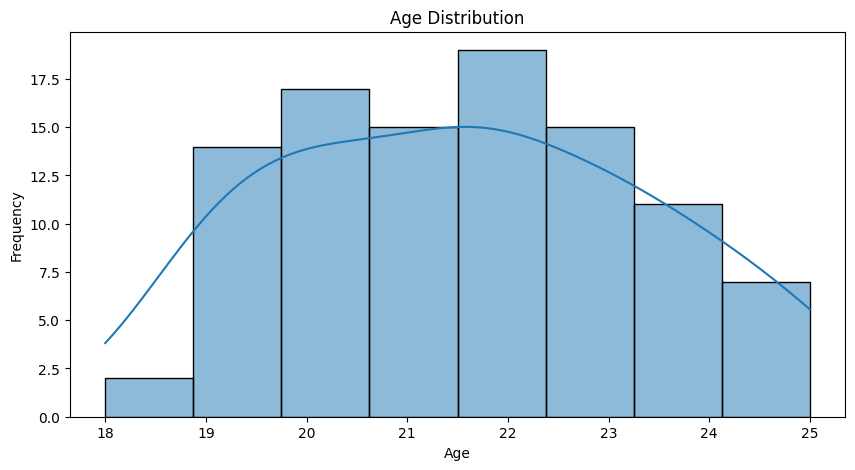

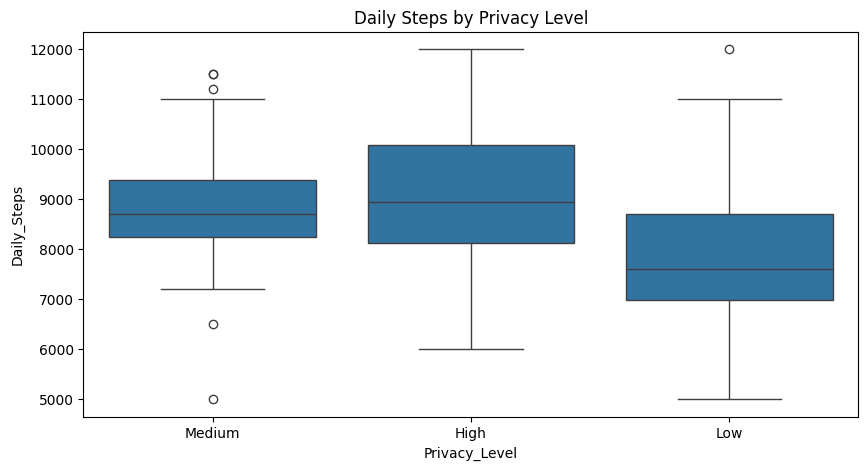

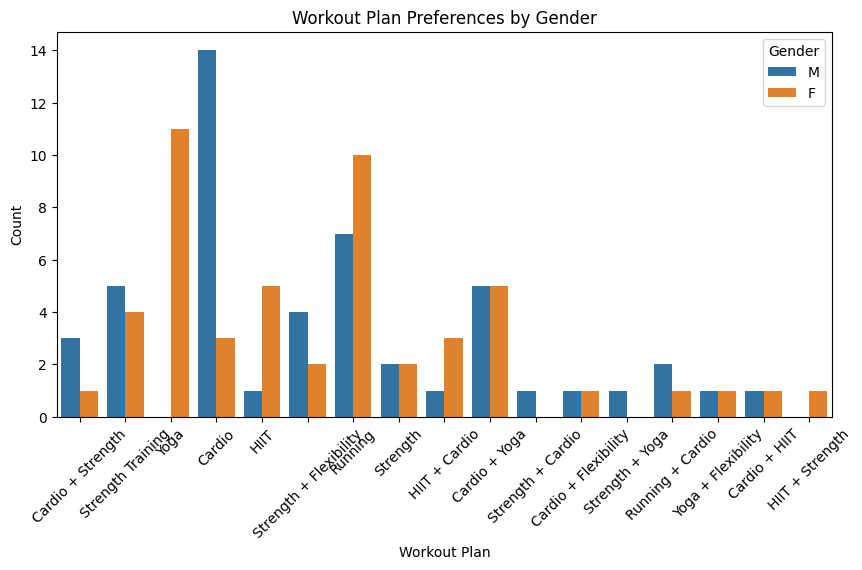

In [14]:

# Step 6: Visualizations
# Plot Age distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot Daily Steps by Privacy Level
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='Privacy_Level', y='Daily_Steps')
plt.title('Daily Steps by Privacy Level')
plt.show()

# Plot Workout Plans by Gender
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Workout_Plan', hue='Gender')
plt.title('Workout Plan Preferences by Gender')
plt.xlabel('Workout Plan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
